In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#Data seems to be already cleaned

In [6]:
# Data Pre Processing:
#     1. Conversion into Numerical form 
#     2. Target column: Rent
#     3. Visualizations
#     4. Some need Numerical Ranking, others dont

## Cateogrical Columns Interpretation

In [7]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [8]:
df["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [9]:
df["Floor"].value_counts() #Exceptions are there

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [10]:
df["Area Type"].value_counts()
#Super Area= Built area + Common Area
#Carpet Area= usable Area->Distance b/w inner walls
#Built Area=Carpet Area+width of walls(interior-exterior)

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [11]:
# len(df["Area Locality"].value_counts())
# ar={}
# # for x in range(len(df.index)):
# #     if df["Area"][x]=="Kolkata": #Different places
# for value in df["Area Locality"]:
#         if value in ar:
#             ar[value] += 1
#         else:
#             ar[value] = 1
            
# ar

df["Area Locality"].value_counts()

            

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [12]:
df["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

## Numerical Columns Interpretations

In [13]:
df.describe() #Numerical values

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [14]:
#can create a new column that tells how high status a location is

## Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bathroom'}>]], dtype=object)

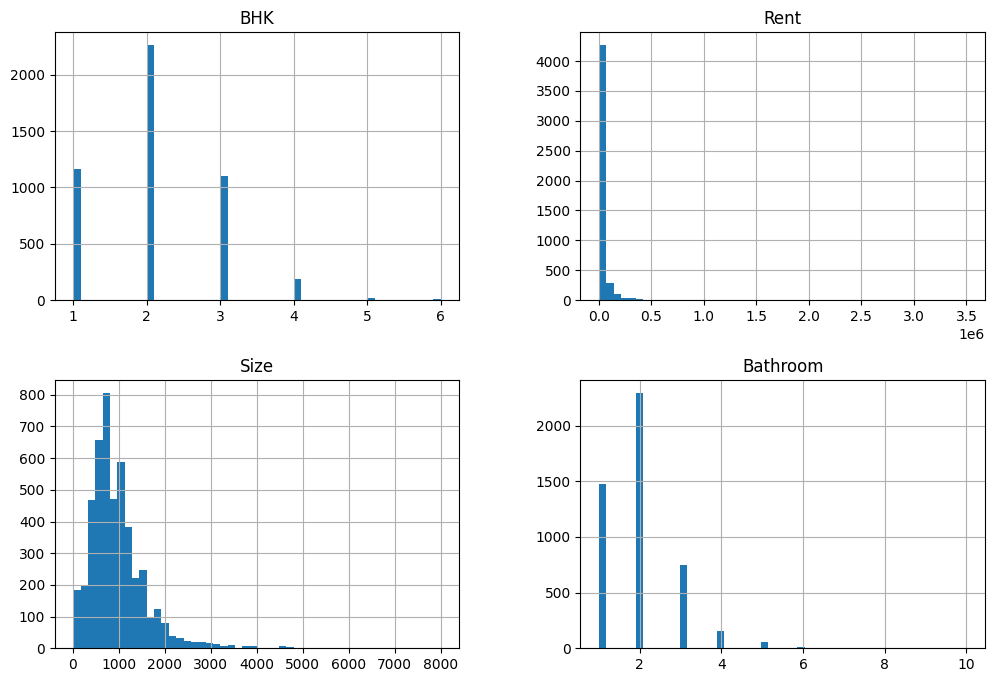

In [17]:
df.hist(bins=50,figsize=(12,8))

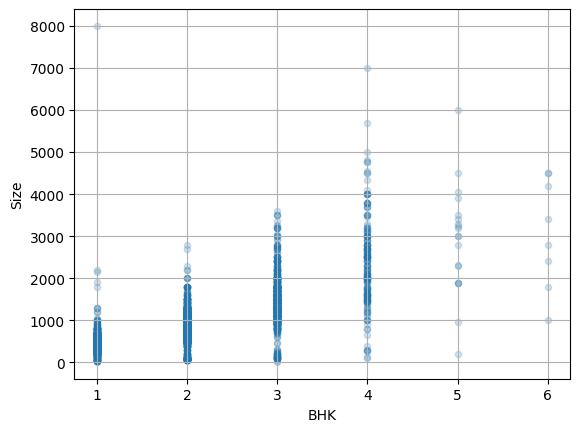

In [18]:
df.plot(kind="scatter",x="BHK",y="Size",grid=True,alpha=0.2)
plt.show()

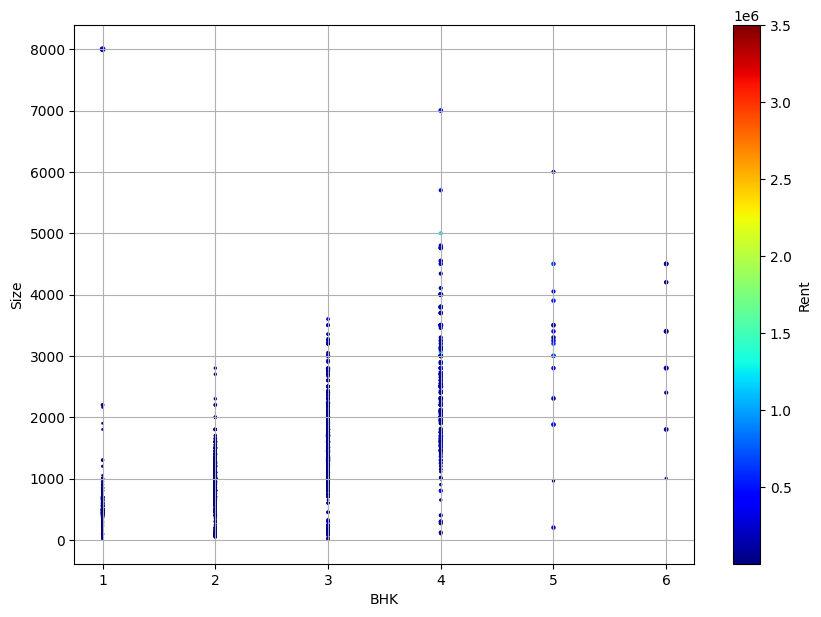

In [19]:
df.plot(kind="scatter",x="BHK",y="Size",grid=True,s=df["Bathroom"],
        c="Rent",cmap="jet",
        colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

/tmp/ipykernel_41022/2022651152.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")


Text(0, 0.5, 'Rent')

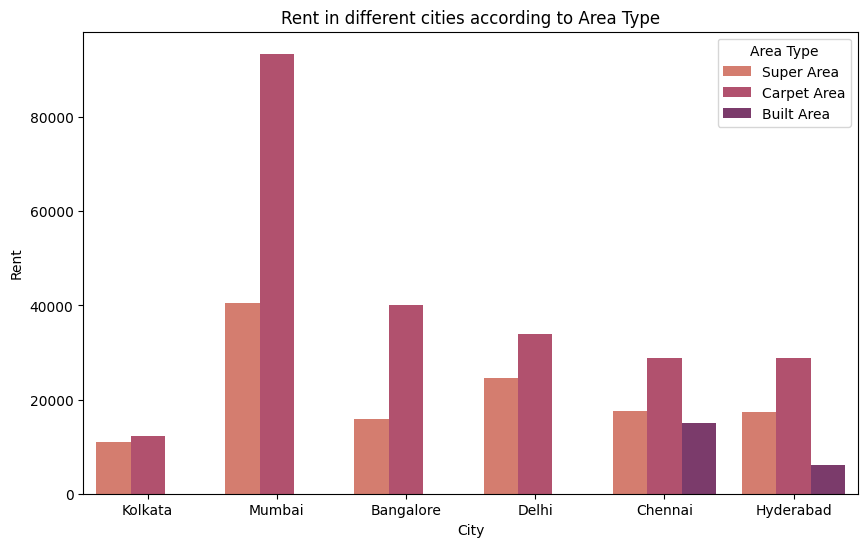

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")
plt.title("Rent in different cities according to Area Type")
plt.ylabel("Rent")

/tmp/ipykernel_41022/1470457671.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Furnishing Status'], ci=None, palette="flare")


Text(0, 0.5, 'Rent')

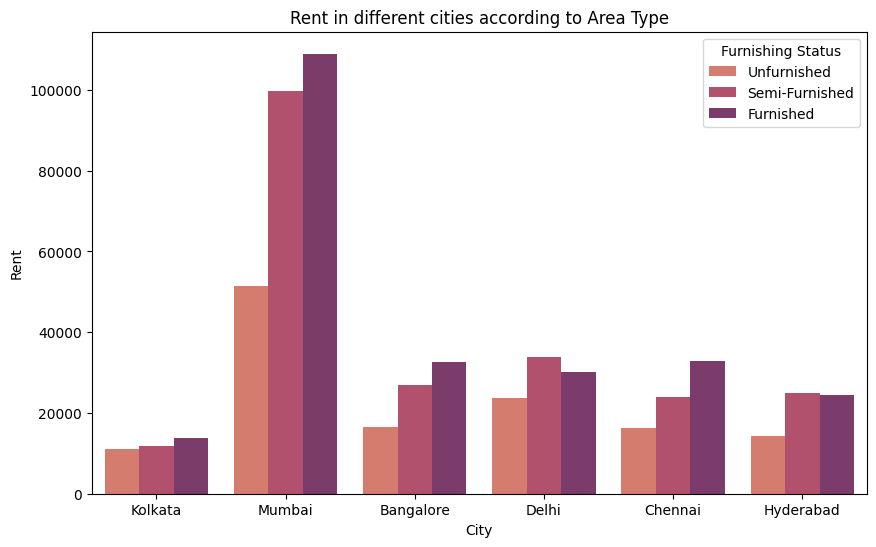

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Furnishing Status'], ci=None, palette="flare")
plt.title("Rent in different cities according to Area Type")
plt.ylabel("Rent")

/tmp/ipykernel_41022/773350537.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Point of Contact'], ci=None, palette="flare")


Text(0, 0.5, 'Rent')

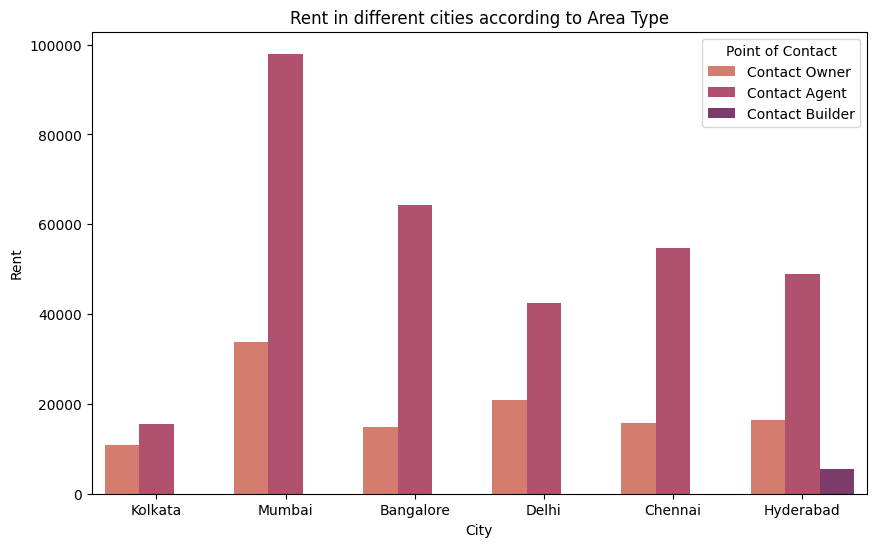

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Point of Contact'], ci=None, palette="flare")
plt.title("Rent in different cities according to Area Type")
plt.ylabel("Rent")

/tmp/ipykernel_41022/3175401272.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Point of Contact'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")


Text(0, 0.5, 'Rent')

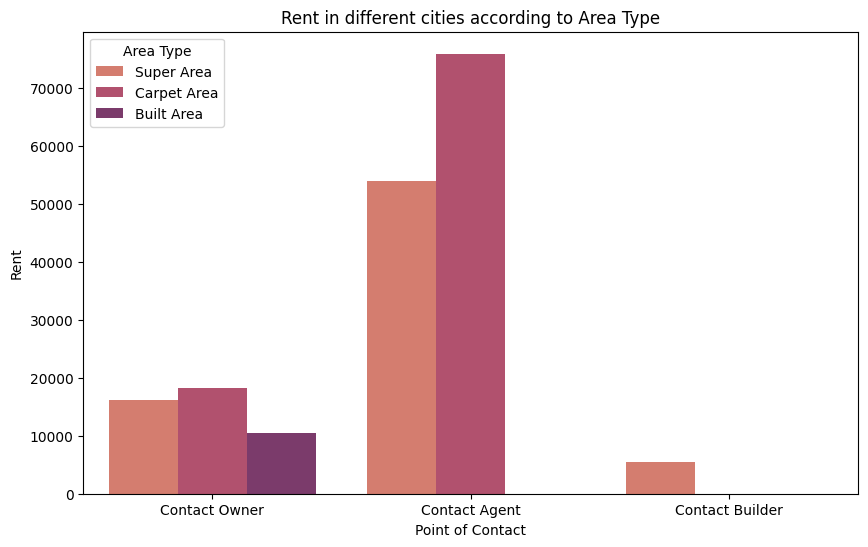

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Point of Contact'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")
plt.title("Rent in different cities according to Area Type")
plt.ylabel("Rent")

/tmp/ipykernel_41022/1652341750.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Furnishing Status'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")


Text(0, 0.5, 'Rent')

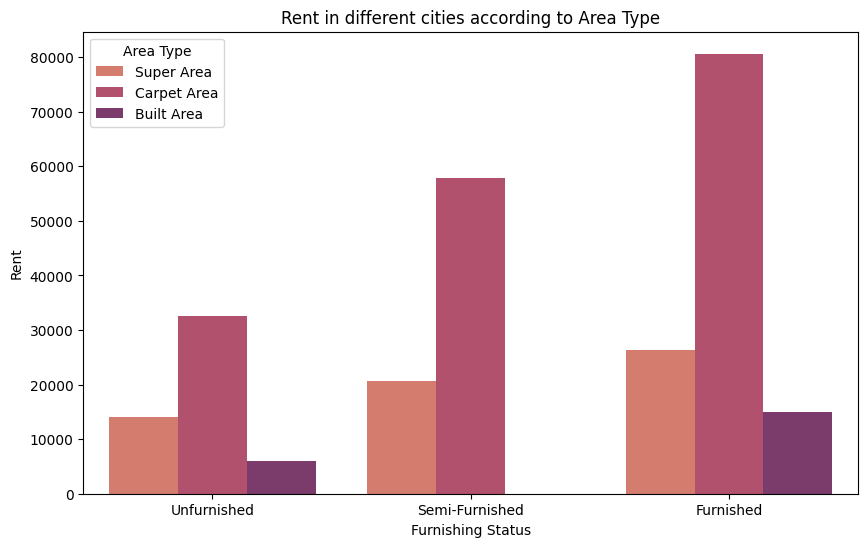

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Furnishing Status'], y=df['Rent'], hue=df['Area Type'], ci=None, palette="flare")
plt.title("Rent in different cities according to Area Type")
plt.ylabel("Rent")

In [25]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 4
Discrete features Count 2
Continuous features Count 2
Categorical features Count 8
Binary Categorical features Count 4


In [26]:
outliers_features = [feature for feature in continuous_features]
print(outliers_features)

def remove_outliers(df,outliers_features):
    # create copy of dataframe
    
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(df,outliers_features)

['Rent', 'Size']


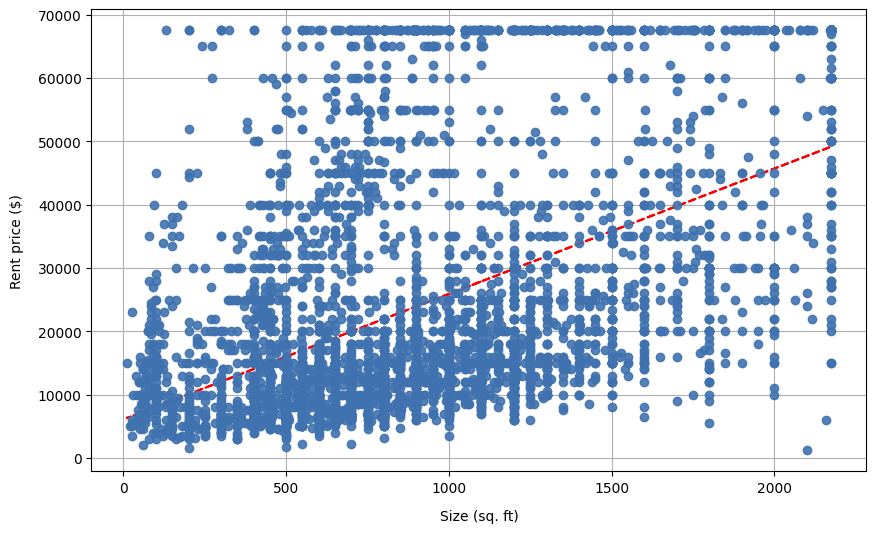

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(df["Size"], df["Rent"], c="#3f72af", zorder=3, alpha=0.9)
ax.set_xlabel("Size (sq. ft)", labelpad=10)
ax.set_ylabel("Rent price ($)", labelpad=10)
z = np.polyfit(df["Size"], df["Rent"], 1)
p = np.poly1d(z)
plt.plot(df["Size"],p(df["Size"]),"r--")
plt.show()

## Conversion Categorical Columns into Numerical Columns

In [28]:
# Some Assumptions:
#     Delhi,Mumbai,Bangalore->Tech Cities->Value 1
#     Kolkata, Hyderabad, Chennai->Developing Tech Cities->2

In [29]:
# Option 1: One hot encoding (doesnt grade the location)
# Option 2: Do Ordinal Encoding (which ranks the location)

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [34]:
num_feats=[ 'BHK', 'Rent', 'Size','Bathroom']
cat_feats=['City', 'Furnishing Status','Tenant Preferred','Area Type']
drop_feats=['Posted On', 'Floor','Area Locality' ,'Point of Contact']
ct=make_column_transformer(
        ("passthrough",num_feats),
        (OneHotEncoder(),cat_feats),
        ('drop',drop_feats)
)



In [35]:
ct.fit_transform(df)

array([[2.00e+00, 1.00e+04, 1.10e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.00e+00, 2.00e+04, 8.00e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.00e+00, 1.70e+04, 1.00e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [3.00e+00, 3.50e+04, 1.75e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.00e+00, 4.50e+04, 1.50e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.00e+00, 1.50e+04, 1.00e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [36]:
columns=ct.get_feature_names_out().tolist()
df=pd.DataFrame(ct.fit_transform(df),columns=columns)

In [37]:
df

,passthrough__BHK,passthrough__Rent,passthrough__Size,passthrough__Bathroom,onehotencoder__City_Bangalore,onehotencoder__City_Chennai,onehotencoder__City_Delhi,onehotencoder__City_Hyderabad,onehotencoder__City_Kolkata,onehotencoder__City_Mumbai,onehotencoder__Furnishing Status_Furnished,onehotencoder__Furnishing Status_Semi-Furnished,onehotencoder__Furnishing Status_Unfurnished,onehotencoder__Tenant Preferred_Bachelors,onehotencoder__Tenant Preferred_Bachelors/Family,onehotencoder__Tenant Preferred_Family,onehotencoder__Area Type_Built Area,onehotencoder__Area Type_Carpet Area,onehotencoder__Area Type_Super Area
0,2.0,10000.0,1100.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,20000.0,800.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,17000.0,1000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,10000.0,800.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,7500.0,850.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.0,15000.0,1000.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4742,3.0,29000.0,2000.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4743,3.0,35000.0,1750.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4744,3.0,45000.0,1500.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
df_corr=df.corr() 

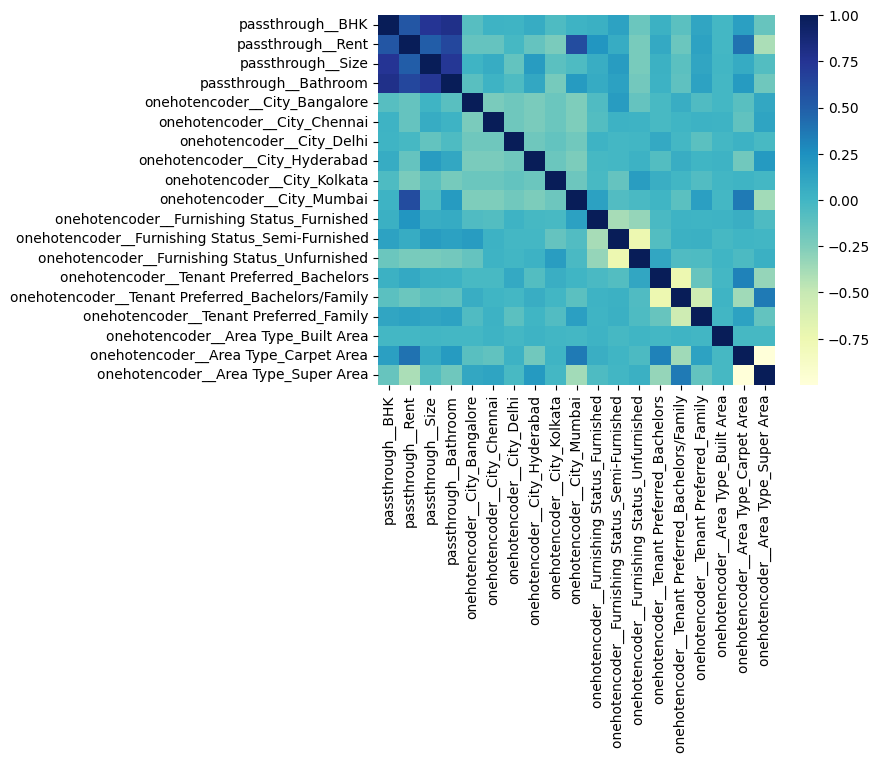

In [39]:
sns.heatmap(df_corr,cmap='YlGnBu')
plt.show()

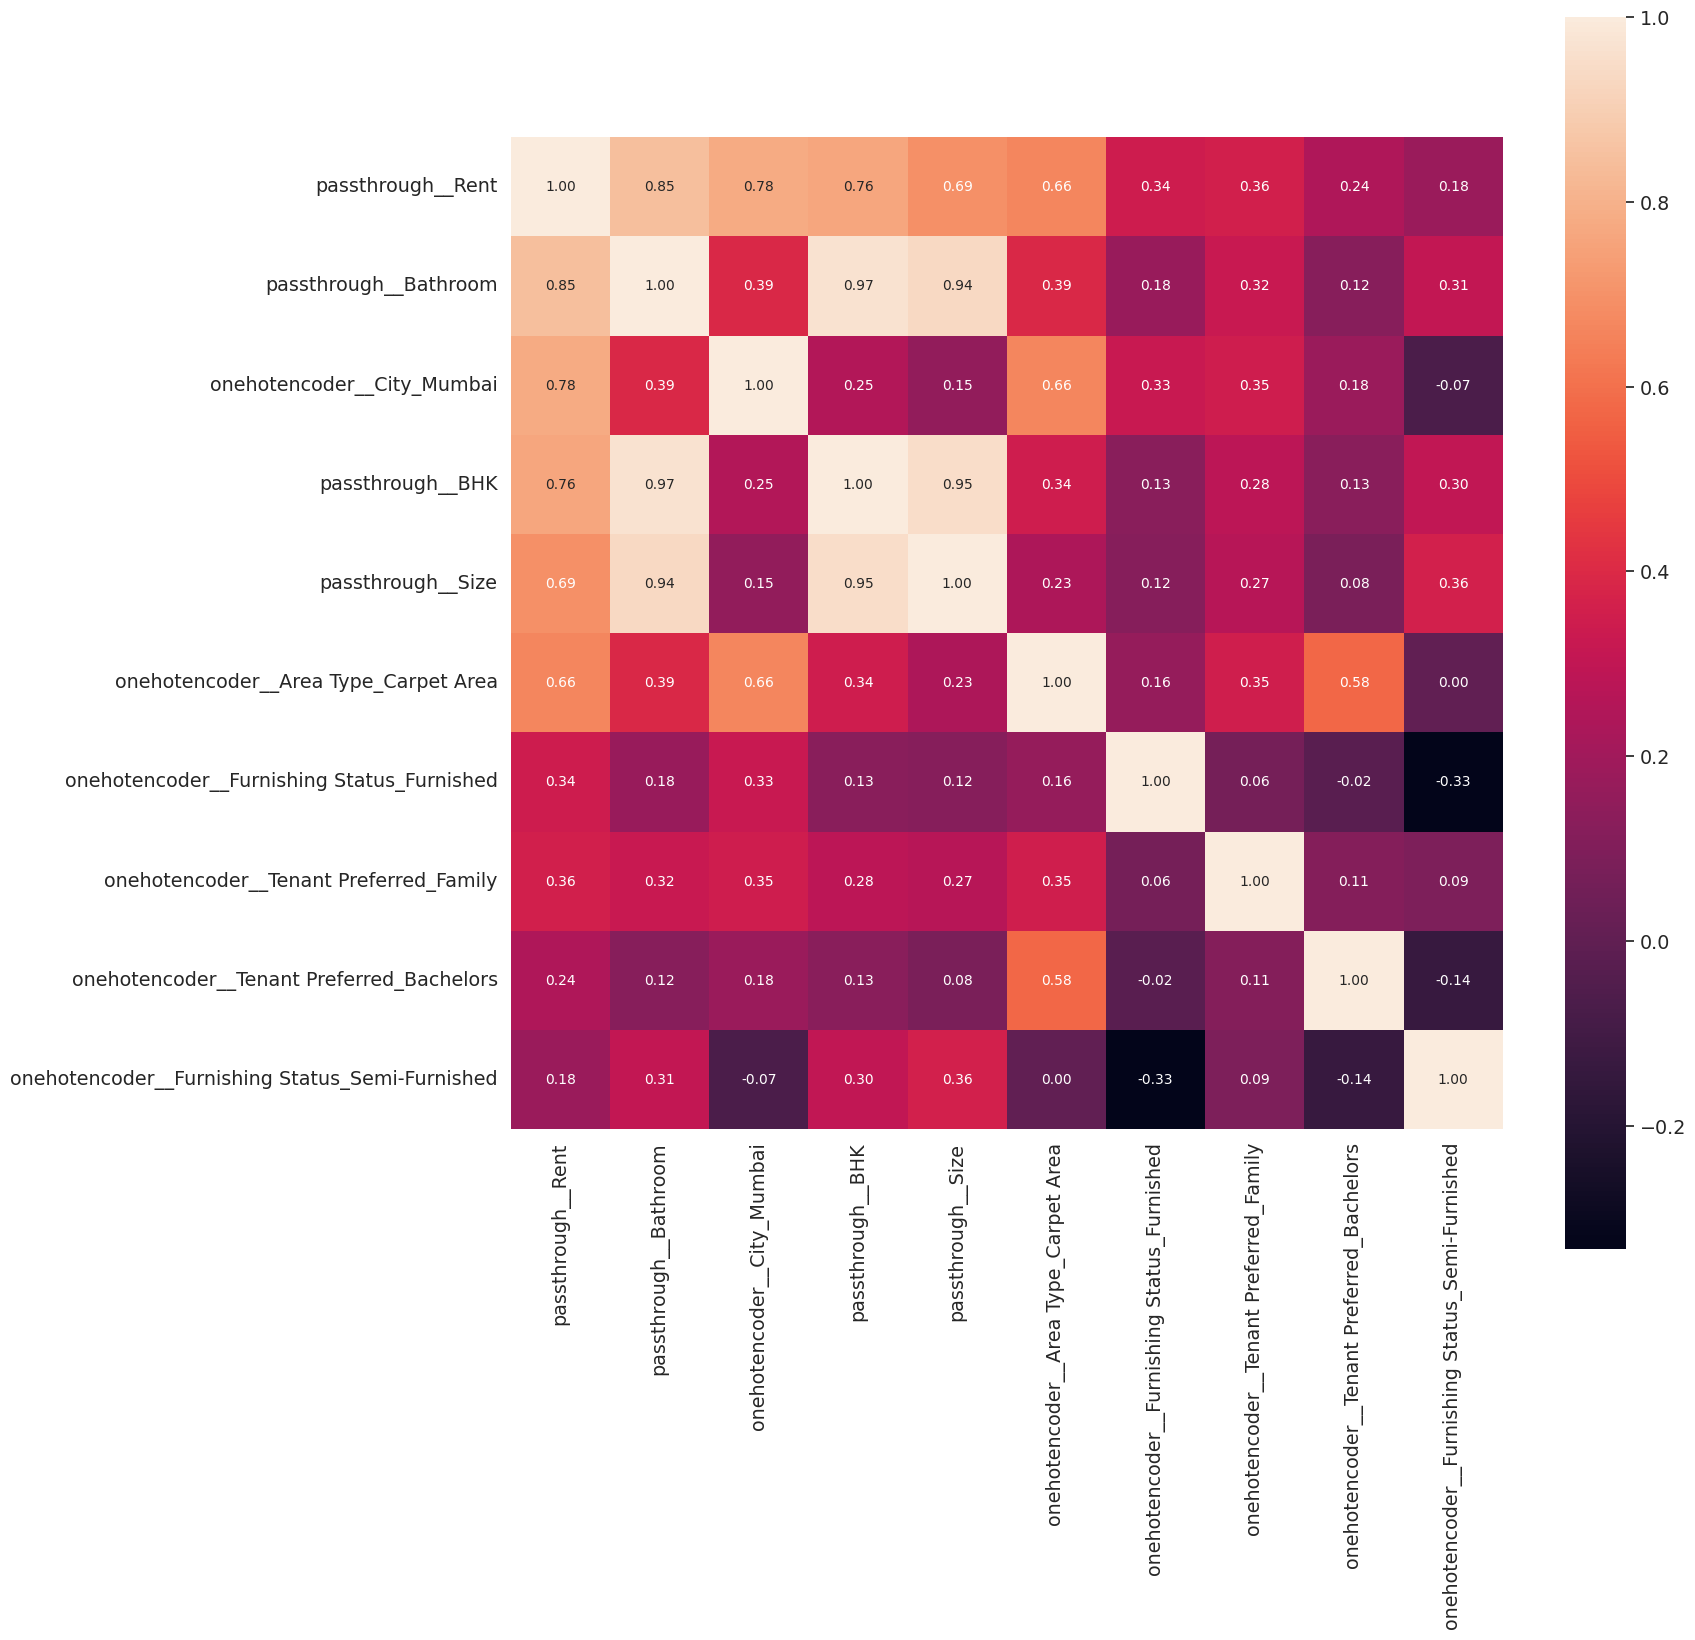

In [43]:
plt.figure(figsize=(16,16))
columns = df_corr.nlargest(10, 'passthrough__Rent')['passthrough__Rent'].index
correlation_matrix = np.corrcoef(df_corr[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

## More Visualizations with the help of Autoviz

Shape of your Data Set loaded: (4746, 19)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    18 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 4746 exceeds maximum, randomly sampling 4746 rows for EDA...

################ Regression problem #####################
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 374 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
passthrough__BHK,float64,0.000000,NA,1.000000,6.000000,has 23 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them.
passthrough__Size,float64,0.000000,NA,10.000000,2175.000000,No issue
passthrough__Bathroom,float64,0.000000,NA,1.000000,10.000000,has 187 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
onehotencoder__City_Bangalore,float64,0.000000,NA,0.000000,1.000000,has 795 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__City_Chennai,float64,0.000000,NA,0.000000,1.000000,has 826 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__City_Delhi,float64,0.000000,NA,0.000000,1.000000,has 579 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__City_Hyderabad,float64,0.000000,NA,0.000000,1.000000,has 795 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__City_Kolkata,float64,0.000000,NA,0.000000,1.000000,has 498 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__City_Mumbai,float64,0.000000,NA,0.000000,1.000000,has 879 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
onehotencoder__Furnishing Status_Furnished,float64,0.000000,NA,0.000000,1.000000,has 630 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


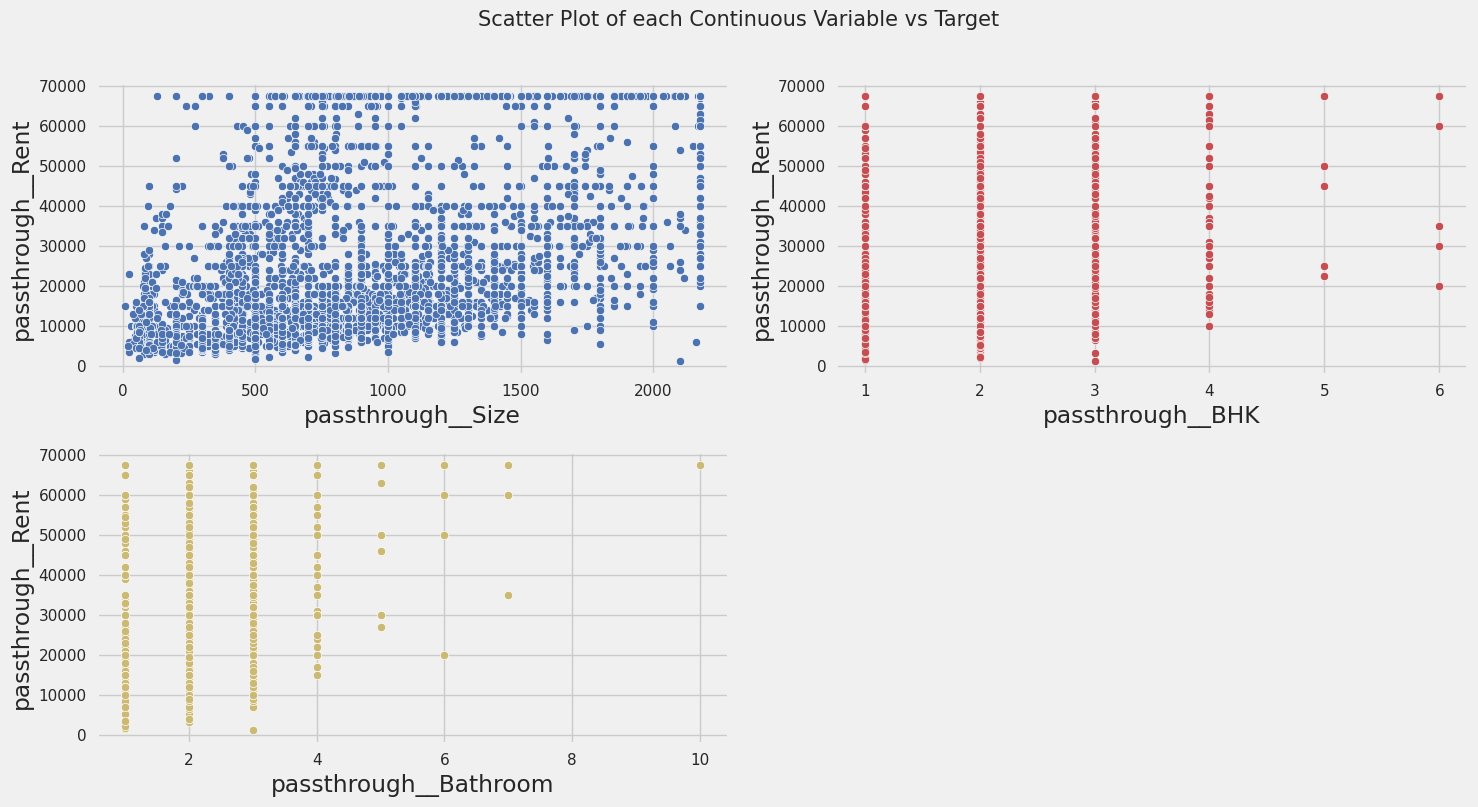

Number of All Scatter Plots = 6


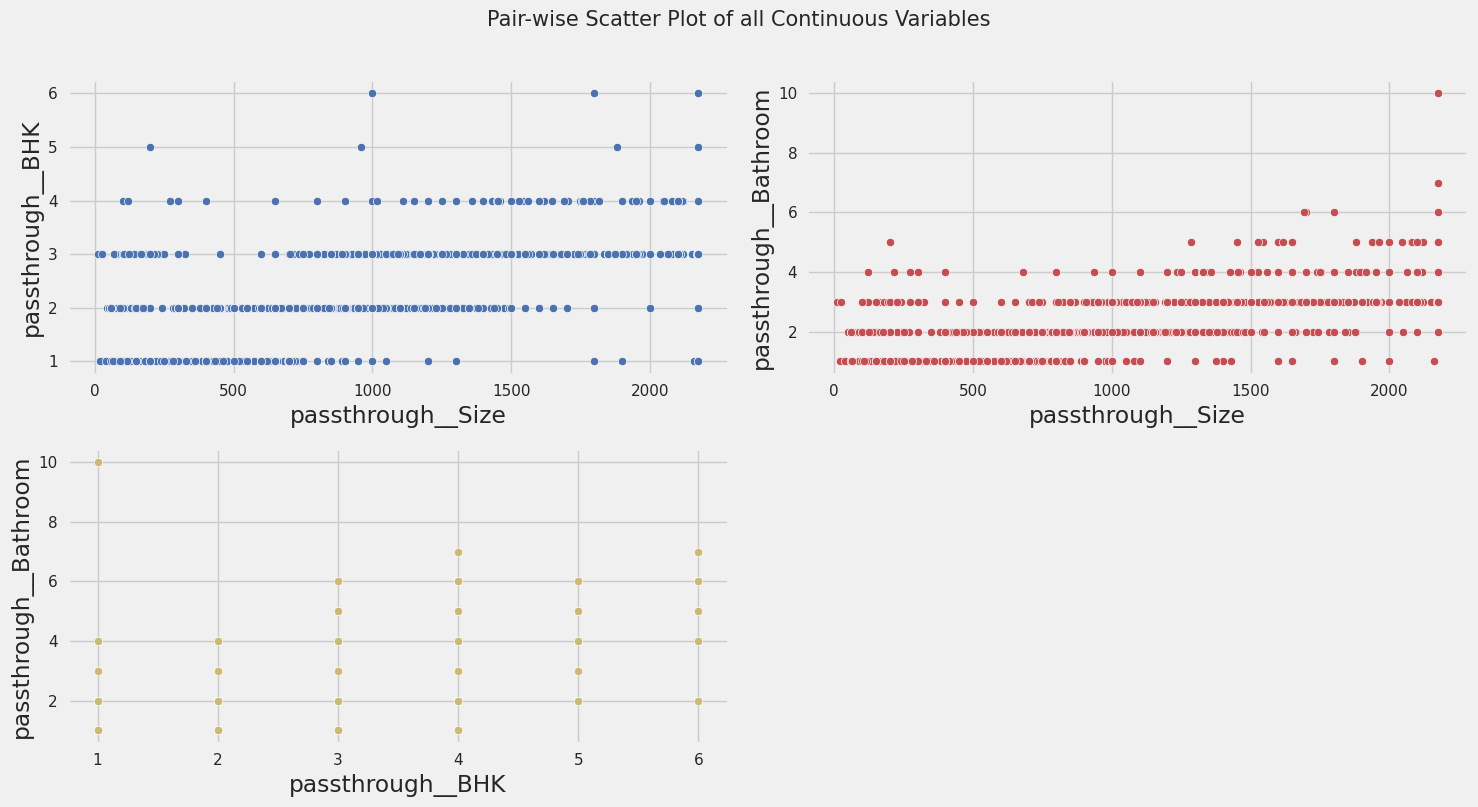

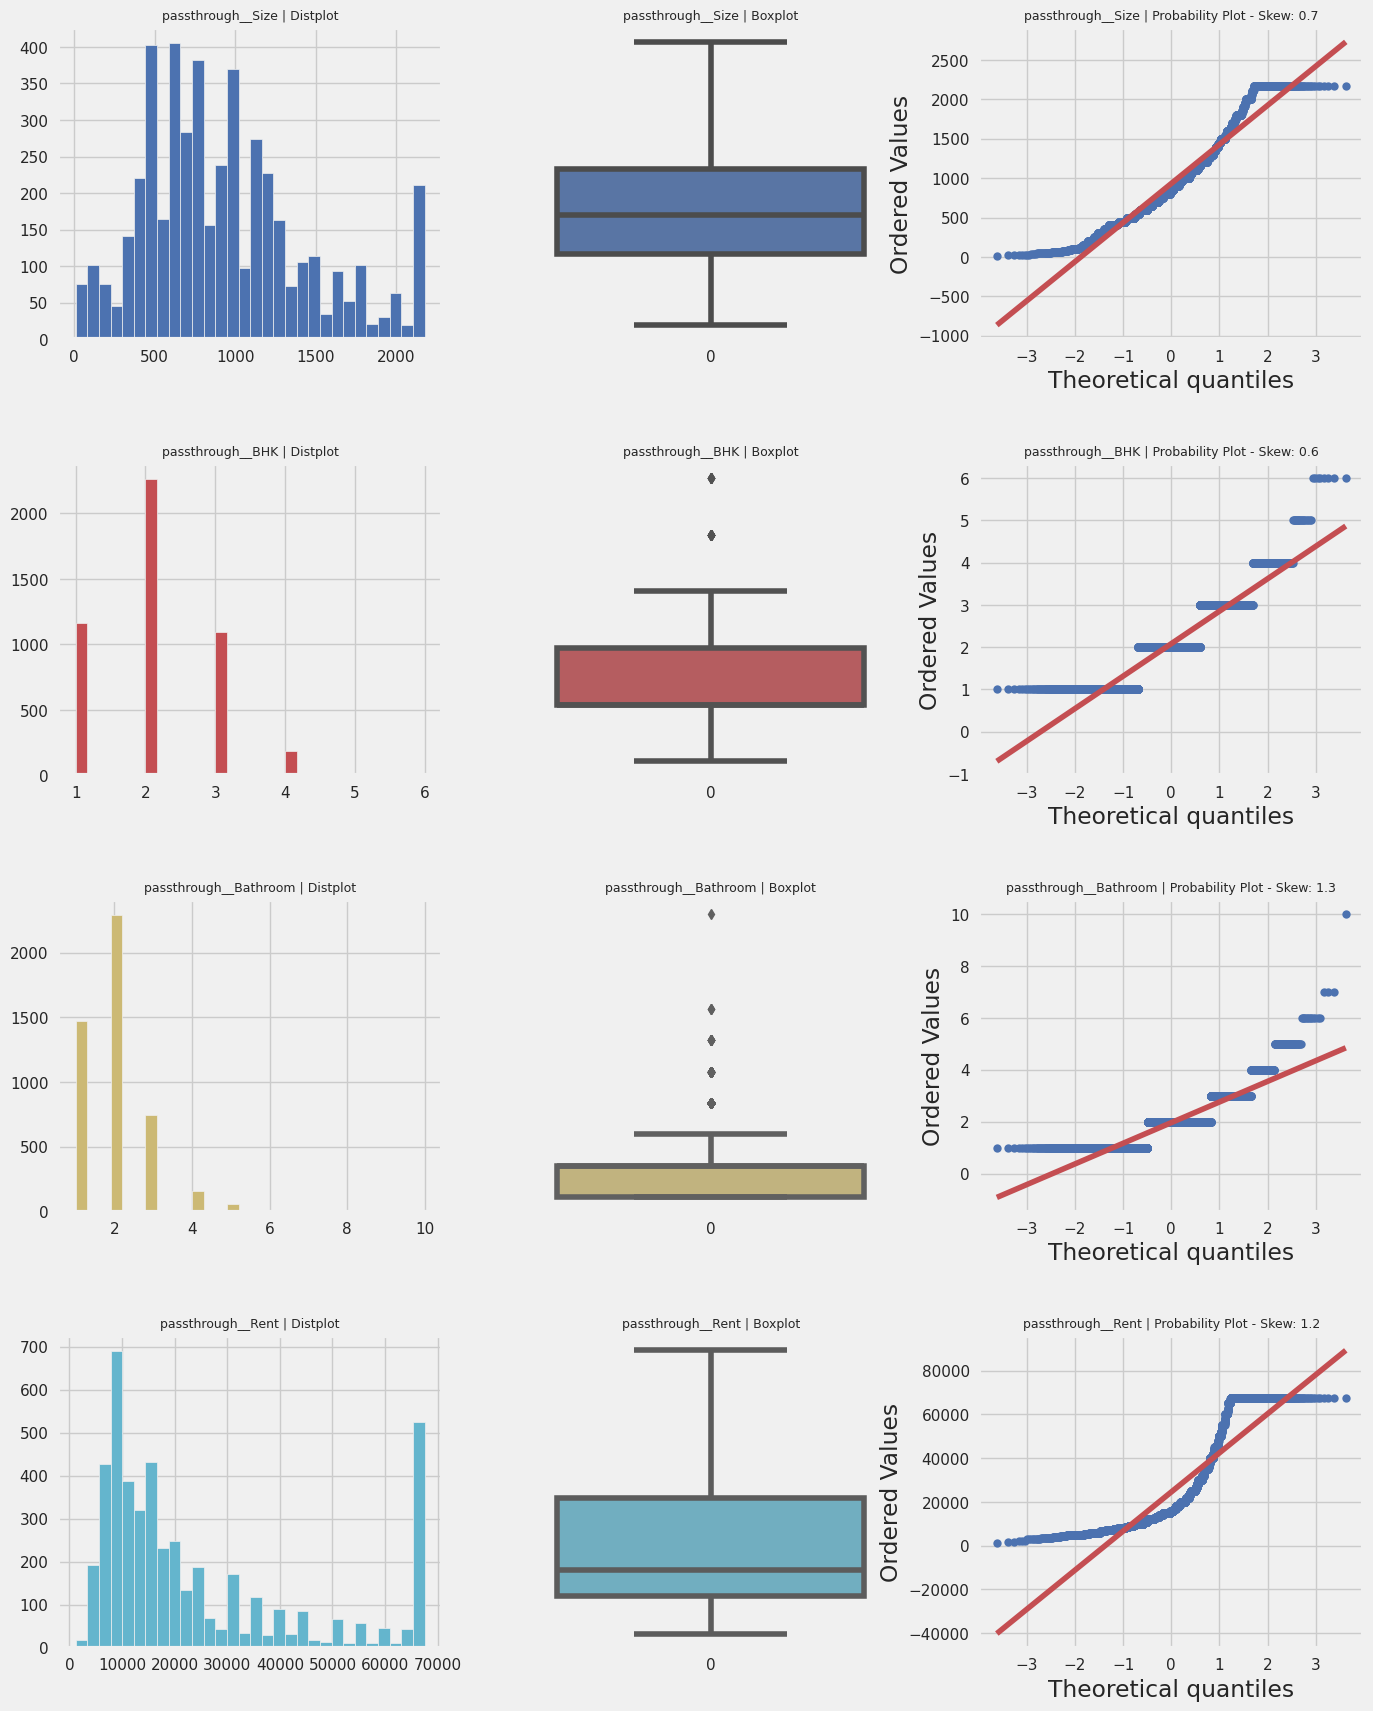

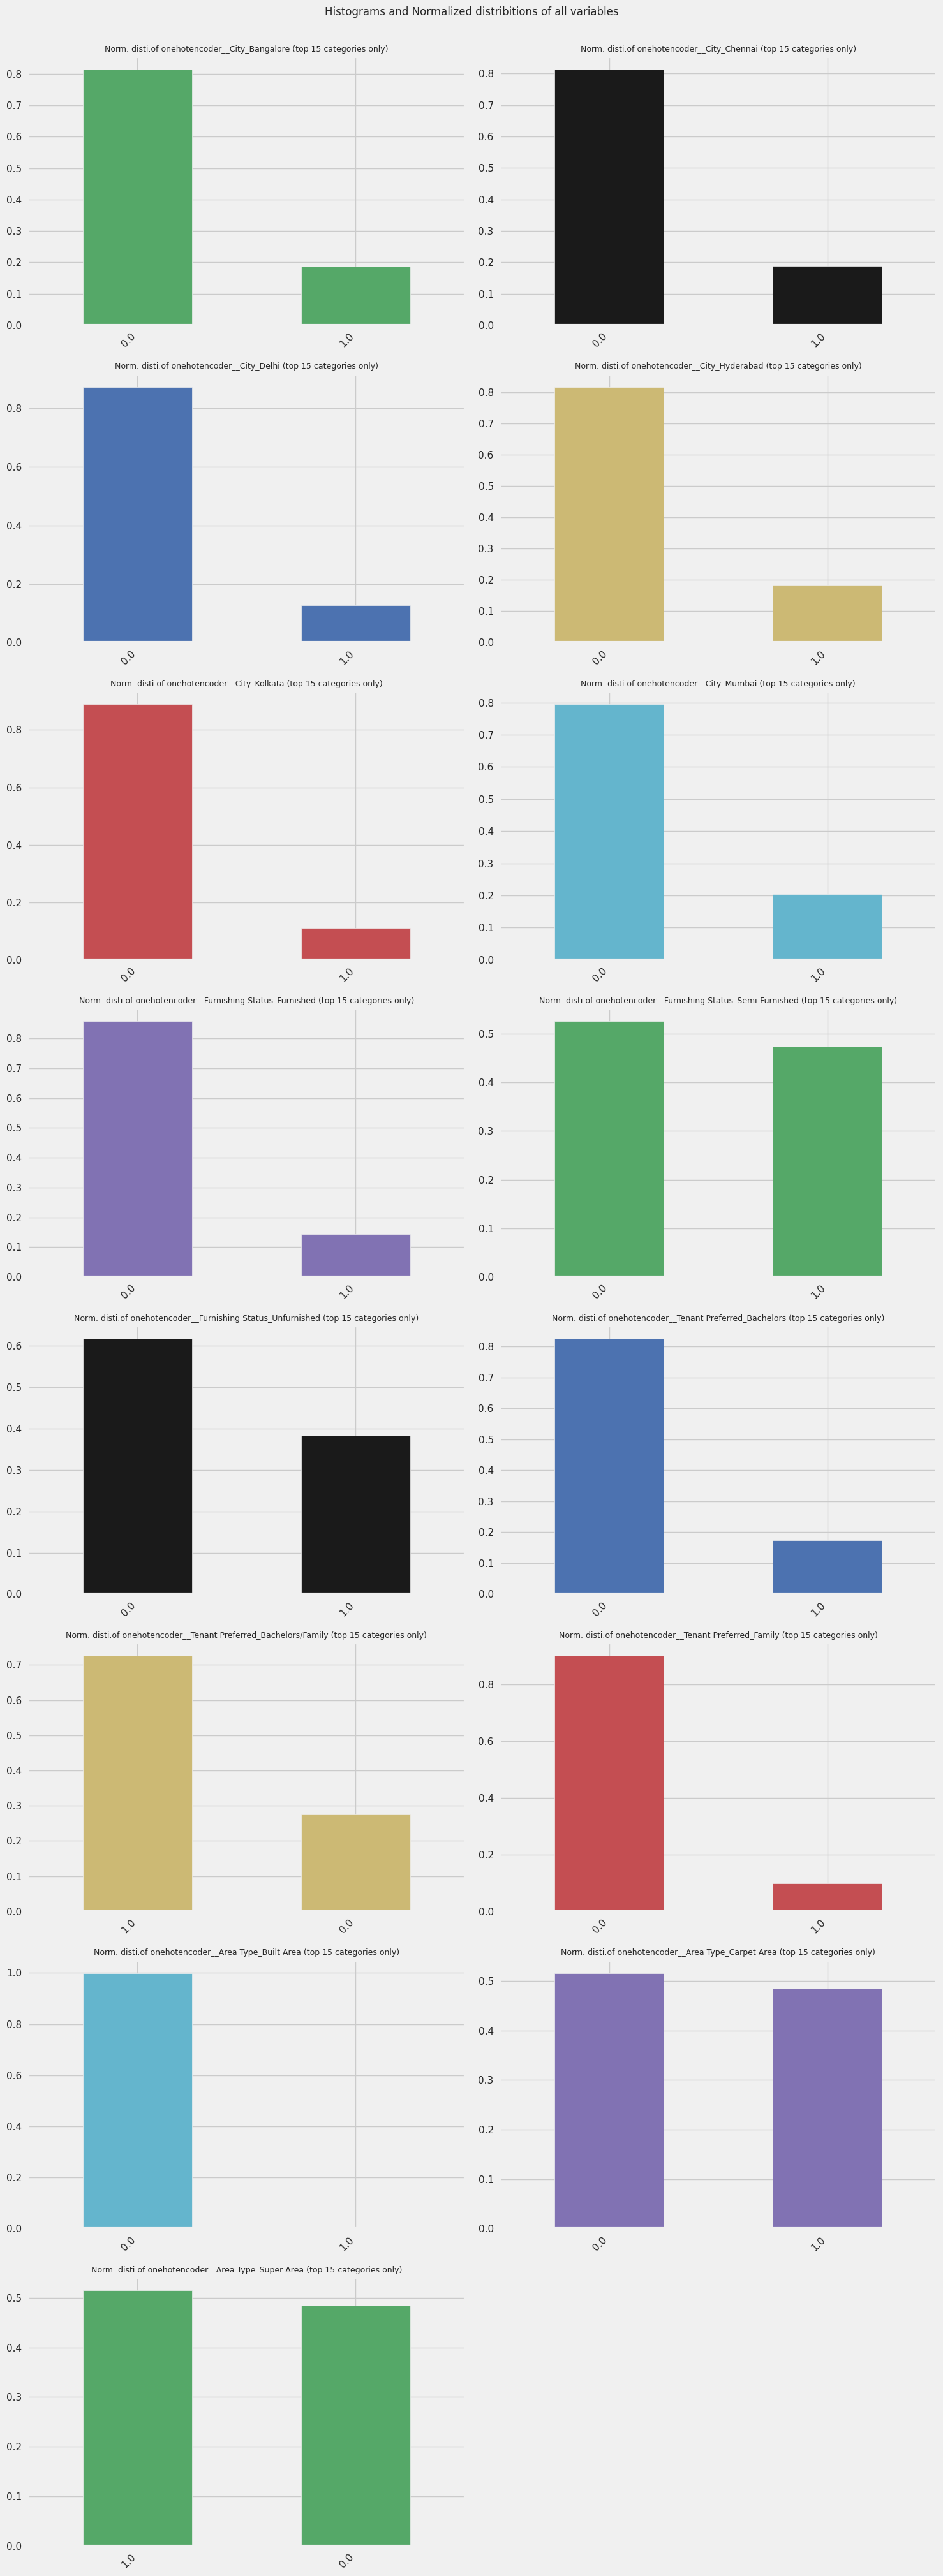

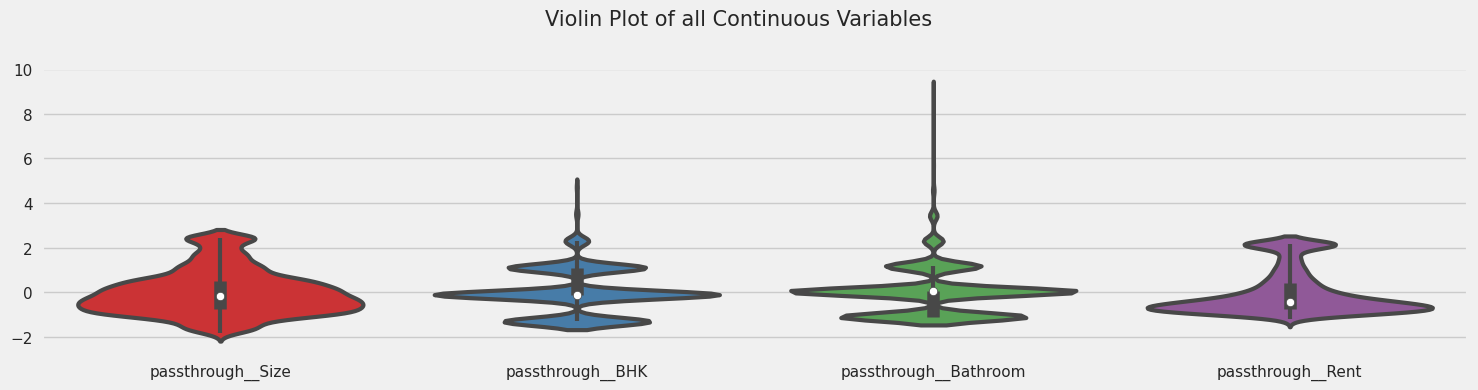

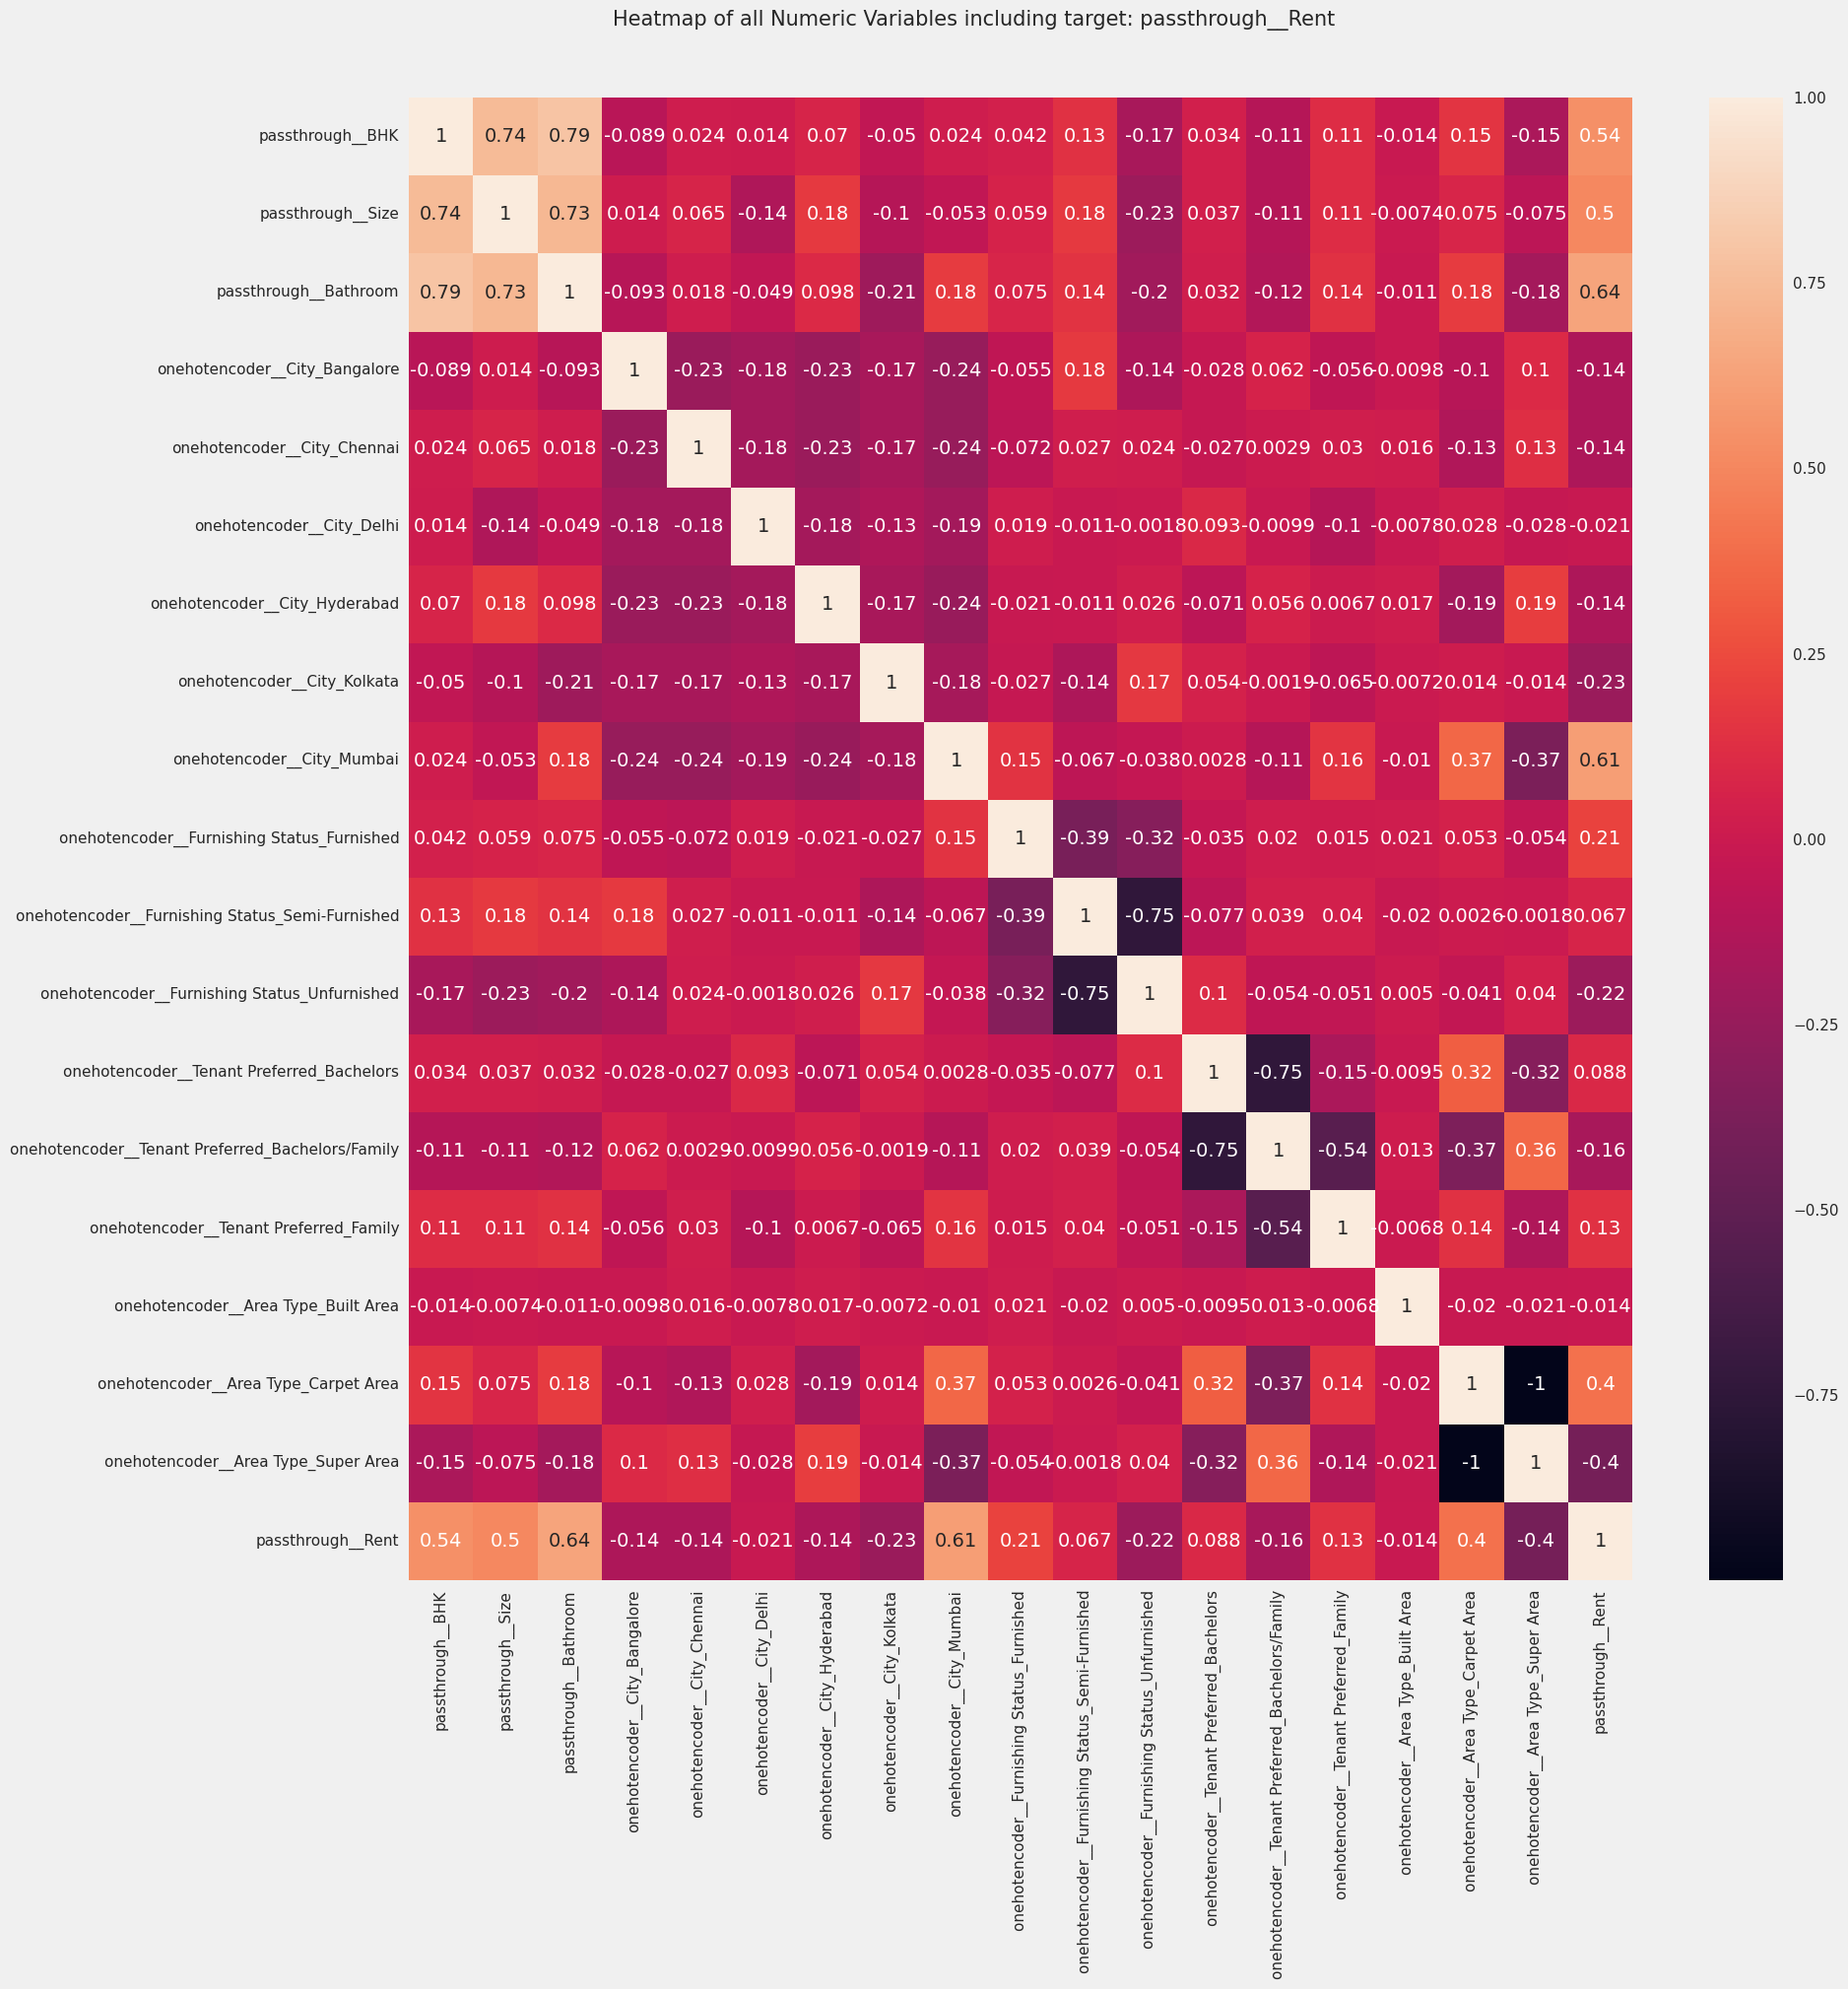

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,passthrough__BHK,passthrough__Size,passthrough__Bathroom,onehotencoder__City_Bangalore,onehotencoder__City_Chennai,onehotencoder__City_Delhi,onehotencoder__City_Hyderabad,onehotencoder__City_Kolkata,onehotencoder__City_Mumbai,onehotencoder__Furnishing Status_Furnished,onehotencoder__Furnishing Status_Semi-Furnished,onehotencoder__Furnishing Status_Unfurnished,onehotencoder__Tenant Preferred_Bachelors,onehotencoder__Tenant Preferred_Bachelors/Family,onehotencoder__Tenant Preferred_Family,onehotencoder__Area Type_Built Area,onehotencoder__Area Type_Carpet Area,onehotencoder__Area Type_Super Area,passthrough__Rent
1332,1.0,410.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50000.0
4345,2.0,1300.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,15000.0
4495,2.0,900.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12000.0
2473,1.0,400.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13000.0
3883,3.0,1798.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.0,280.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20000.0
3264,3.0,1650.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20000.0
1653,2.0,1100.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22000.0
2607,2.0,1800.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30000.0


In [45]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='passthrough__Rent',verbose=1,max_rows_analyzed=df.shape[0])

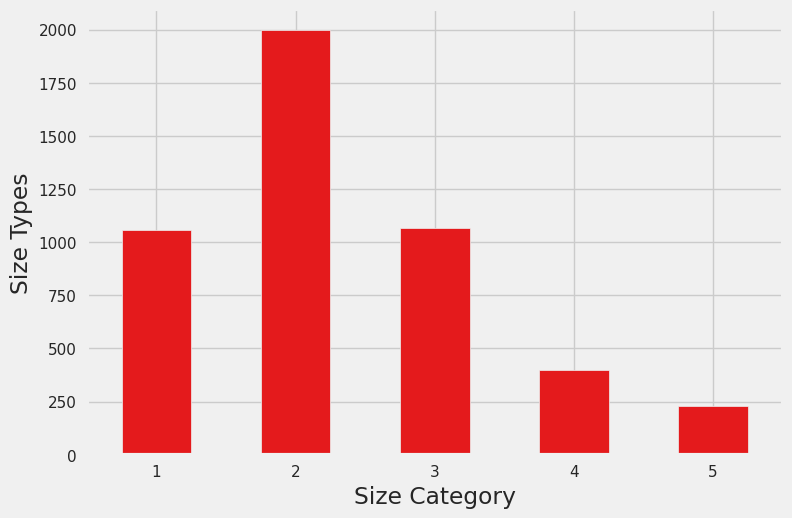

In [46]:
df["Size_cat"]=pd.cut(df["passthrough__Size"],bins=[0,500,1000,1500,2000,np.inf],labels=[1,2,3,4,5])
df["Size_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Size Category")
plt.ylabel("Size Types")
plt.show()

In [47]:
y=df["passthrough__Rent"]
x=df.drop(columns=['passthrough__Rent'],axis=1)

In [48]:
# from sklearn.model_selection import train_test_split
# trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

## Model Training

In [49]:
# !pip install --upgrade pycaret

In [50]:
from pycaret.regression import *
setup_de_regressao = setup(data=train_df, target='passthrough__Rent')
best_models = compare_models(n_select=5)

,Description,Value
0,Session id,1974
1,Target,passthrough__Rent
2,Target type,Regression
3,Original data shape,"(3796, 20)"
4,Transformed data shape,"(3796, 24)"
5,Transformed train set shape,"(2657, 24)"
6,Transformed test set shape,"(1139, 24)"
7,Numeric features,18
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5781.9673,72789082.8972,8512.6776,0.8121,0.3661,0.3148,0.0750
lightgbm,Light Gradient Boosting Machine,5701.2544,73010108.9750,8531.9040,0.8107,0.3665,0.3096,194.0710
rf,Random Forest Regressor,5864.6788,79498189.3016,8900.7523,0.7946,0.3841,0.3261,0.1510
xgboost,Extreme Gradient Boosting,5954.6262,82804795.6000,9079.3154,0.7855,0.3904,0.3261,1.2890
br,Bayesian Ridge,7083.1757,93509833.6201,9656.3301,0.7599,0.5575,0.3964,0.0280
ridge,Ridge Regression,7080.1204,93520129.7245,9656.9362,0.7599,0.5491,0.3962,0.0280
lr,Linear Regression,7078.3772,93557387.0573,9658.8465,0.7598,0.5447,0.3962,0.3490
lasso,Lasso Regression,7077.5319,93528825.2535,9657.4458,0.7598,0.5448,0.3960,0.2080
llar,Lasso Least Angle Regression,7077.6173,93532340.0548,9657.6148,0.7598,0.5453,0.3960,0.0290
huber,Huber Regressor,7060.3327,96202785.2444,9792.1450,0.7530,0.5207,0.3791,0.0470


In [51]:
best_models[0]

GradientBoostingRegressor(random_state=1974)

In [52]:
cat_tunado = tune_model(best_models[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5486.2834,76150255.5621,8726.4114,0.8026,0.3669,0.2996
1,5897.9184,81638588.0950,9035.4075,0.8058,0.3710,0.3213
2,5924.4294,84556242.9474,9195.4469,0.7621,0.3796,0.3085
3,5504.9872,75772130.9616,8704.7189,0.8046,0.3784,0.3293
4,5955.4842,88095598.0180,9385.9255,0.8018,0.3683,0.2970
5,6176.0145,78745234.6649,8873.8512,0.7232,0.4002,0.3804
6,5840.4236,76605662.0423,8752.4661,0.8265,0.3687,0.3095
7,5479.6455,65163962.2730,8072.4199,0.8380,0.3408,0.2843
8,5550.0091,62354704.5903,7896.4995,0.8265,0.3724,0.3314


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [54]:
model_final = finalize_model(cat_tunado)

In [55]:
predictions = predict_model(model_final, test_df)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,5951.1828,76885247.8992,8768.4233,0.8180,0.3925,0.3668


,passthrough__BHK,passthrough__Size,passthrough__Bathroom,onehotencoder__City_Bangalore,onehotencoder__City_Chennai,onehotencoder__City_Delhi,onehotencoder__City_Hyderabad,onehotencoder__City_Kolkata,onehotencoder__City_Mumbai,onehotencoder__Furnishing Status_Furnished,...,onehotencoder__Furnishing Status_Unfurnished,onehotencoder__Tenant Preferred_Bachelors,onehotencoder__Tenant Preferred_Bachelors/Family,onehotencoder__Tenant Preferred_Family,onehotencoder__Area Type_Built Area,onehotencoder__Area Type_Carpet Area,onehotencoder__Area Type_Super Area,Size_cat,passthrough__Rent,prediction_label
4733,1.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,5000.0,15729.516906
4315,3.0,1600.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4,32000.0,26849.911632
2555,2.0,500.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,5000.0,10459.246048
440,2.0,550.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,6500.0,6948.155168
1370,3.0,967.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,67500.0,65000.243762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,1.0,400.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,50000.0,27484.885857
4114,2.0,750.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,6000.0,10874.482120
3181,2.0,1145.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3,11000.0,14528.960141
2099,3.0,2000.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4,26000.0,37363.947624
